# ME4 Machine Learning - Tutorial 2

In [77]:
import sys
# setting path
sys.path.append('..')

from helperlib import (
    mathfunctions as hmath, 
    arrayfunctions as harray) 

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(5)

# Don't show plots inline
%matplotlib agg

In [78]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 1)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0])
fig.tight_layout(pad=5.0)

## 1. Prior, posterior and likelihood calculation

### 1.1. Define a function to generate the Gaussian shape

Defined in `helperlib.mathfunctions.gaussian()`

### 1.2. Define two probability distributions

define two probability distributions for $p(x|ω1)$ and $p(x|ω2)$. 

- $p(x|ω1)$ is a sum of two normal distributions/Gaussians, one with $µ=2$ and $σ=1.5$ and one with $µ=7$ and $σ=0.5$. Both are unscaled relative to each other, i.e. just summed together. 

- $p(x|ω2)$ is defined in the same way, except with Gaussians at $µ=8$ and $σ=2.5$, and $µ=3.5$ and $σ=1$. 

Generate these two probability distributions, across a range of `x` values for 200 points between -10 and 20. Scale both distributions such that they integrate to 1 overall (hint: the command `p /= np.trapz(p, x)`, where `p` is defined as a function of `x`, will divide p by the area beneath the curve). Plot these.

In [79]:
n = 200
x = np.linspace(-10, 20, n)

p_x_w1_meanstdpair1 = (2, 1.5)
p_x_w1_meanstdpair2 = (7, 0.5)
p_x_w1 = np.array([
    hmath.gaussian(x_i, *p_x_w1_meanstdpair1) + hmath.gaussian(x_i, *p_x_w1_meanstdpair2) for x_i in x])

p_x_w2_meanstdpair1 = (8, 2.5)
p_x_w2_meanstdpair2 = (3.5, 1)
p_x_w2 = np.array([
    hmath.gaussian(x_i, *p_x_w2_meanstdpair1) + hmath.gaussian(x_i, *p_x_w2_meanstdpair2) for x_i in x])

# Scale both distributions:
p_x_w1 /= np.trapz(p_x_w1, x)
p_x_w2 /= np.trapz(p_x_w2, x)

p_x_w = [p_x_w1, p_x_w2]

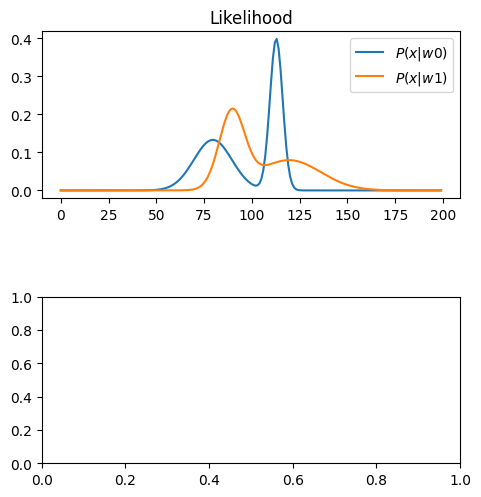

In [80]:
[ax1.plot(p_x_wj, label=f'$P(x|w{j})$') for j, p_x_wj in enumerate(p_x_w)]
ax1.set_title("Likelihood")
ax1.legend()
fig

### 1.3. Calculate the posterior distribution

The prior probabilities are $P(ω1) = P(ω2) = 0.5$. Calculate the posterior distribution and plot it for both states of nature. Compare to the likelihood for both states of nature. In both cases set the x axis limits to -3 to 15. 

If you were to change the probabilities to $P(ω1) = 0.9$, $P(ω2) = 0.1$, what do you think would happen to the posterior and why? Try it and see.

In [81]:
p_w1= np.array([0.5] * n)
p_w2 = np.array([0.5] * n)
p_w = [p_w1, p_w2]

In [82]:
def get_p_x(p_x_w, p_w):
    sum_array = p_x_w[0] * p_w[0]
    for j in range(1, len(p_w)):
        sum_array += (p_x_w[j] * p_w[j])
    return sum_array

In [83]:
def get_p_w_x(p_x_w, p_w):
    p_x = get_p_x(p_x_w, p_w)
    return [p_x_w[j] * p_w[j] / p_x for j in range(len(p_w))]

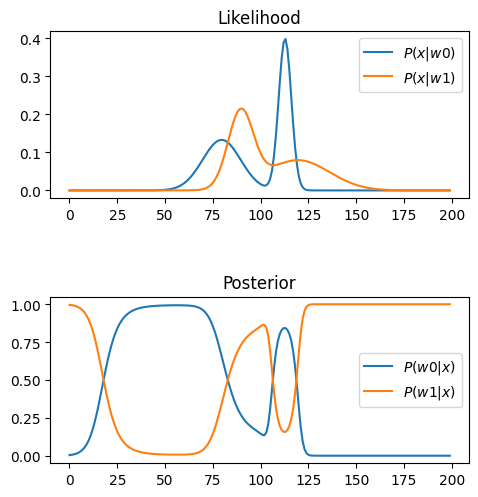

In [84]:
p_w_x = get_p_w_x(p_x_w, p_w)
[ax2.plot(p_wj_x, label=f'$P(w{j}|x)$') for j, p_wj_x in enumerate(p_w_x)]
ax2.set_title("Posterior")
ax2.legend()
fig